In [1]:
from constructor import Constructor
from models import Data 

In [2]:
import tensorflow as tf
import numpy as np
import os 

In [3]:
Data = Data([1,1,1],30000,0.01)

In [4]:
Data.getData(150,128,num_predictions=300)

In [5]:
Data.x_train.shape

TensorShape([15360, 150, 3])

In [6]:
Data.batch_size

3840

In [7]:
model10 = Constructor(Data,16,10,128)
model10.fitModel()
model20 = Constructor(Data,32,10,128)
model20.fitModel()
model30 = Constructor(Data,64,10,128)
model30.fitModel()
model40 = Constructor(Data,128,10,128)
model40.fitModel()
model50 = Constructor(Data,256,10,128)
model50.fitModel()

Epoch 1/10
120/120 [==============================] - 40s 322ms/step - loss: 0.5820 - accuracy: 0.2733 - val_loss: 0.2284 - val_accuracy: 0.4932

Epoch 00001: saving model to training_checkpoints/16LSTM_Neurons10Epochs.ckpt
Epoch 2/10
 44/120 [==========>...................] - ETA: 22s - loss: 0.2059 - accuracy: 0.4916

KeyboardInterrupt: 

In [90]:
model11 = Constructor(Data,16,10,128,baseline=False)
model21 = Constructor(Data,32,10,128,baseline=False)
model31 = Constructor(Data,64,10,128,baseline=False)
model41 = Constructor(Data,128,10,128,baseline=False)
model51 = Constructor(Data,256,10,128,baseline=False)

In [91]:
model11.predict()
model21.predict()


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [92]:
import matplotlib.pyplot as plt

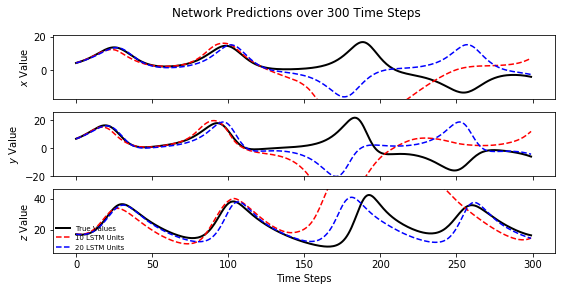

In [136]:
fig,axs = plt.subplots(3,figsize=(9,4), sharex=True)
fig.suptitle('Network Predictions over 300 Time Steps')

for i,ax in enumerate(axs.flat):
    ax.set_ylim([min(Data.prediction_y_data[:,i])-4\
                 ,max(Data.prediction_y_data[:,i])+4])
    ax.set_xlim([-15,Data.num_predictions+15])

l1 = axs[0]\
.plot(Data.prediction_y_data[:,0],'k-', label= "True Values", linewidth=2)
axs[0].set(ylabel='$x$ Value')
axs[0].plot(model11.pred_y_hat[:,0],'r--',label = "10 LSTM Units")
axs[0].plot(model21.pred_y_hat[:,0],'b--',label = "20 LSTM Units")
l2 = axs[1]\
.plot(Data.prediction_y_data[:,1],'k-',label = "True Values", linewidth=2)
axs[1].set(ylabel='$y$ Value')
axs[1].plot(model11.pred_y_hat[:,1],'r--',label = "10 LSTM Units")
axs[1].plot(model21.pred_y_hat[:,1],'b--',label = "20 LSTM Units")
l3 = axs[2]\
.plot(Data.prediction_y_data[:,2],'k-',label = "True Values", linewidth=2)
axs[2].set(ylabel='$z$ Value')
axs[2].plot(model11.pred_y_hat[:,2],'r--',label = "10 LSTM Units")
axs[2].plot(model21.pred_y_hat[:,2],'b--',label = "20 LSTM Units")

for ax in axs.flat:
    ax.set(xlabel='Time Steps')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
plt.legend(loc=(0,0), frameon=False, fontsize="x-small")
 
plt.show()
fig.savefig("plotstest/"+"test.png", bbox_inches='tight',transparent=True, dpi=1200)
plt.clf()
plt.cla()
plt.close()

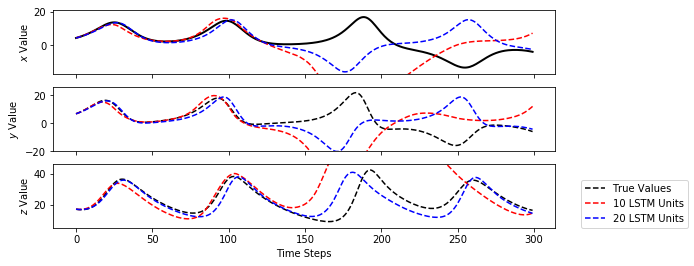

In [125]:
fig,axs = plt.subplots(3,figsize=(9,4), sharex=True)
for i,ax in enumerate(axs.flat):
    ax.set_ylim([min(Data.prediction_y_data[:,i])-4\
                 ,max(Data.prediction_y_data[:,i])+4])

l1 = axs[0]\
.plot(Data.prediction_y_data[:,0],'k-', label= "True Values", linewidth=2)
axs[0].set(ylabel='$x$ Value')
axs[0].plot(model11.pred_y_hat[:,0],'r--',label = "10 LSTM Units")
axs[0].plot(model21.pred_y_hat[:,0],'b--',label = "20 LSTM Units")
l2 = axs[1]\
.plot(Data.prediction_y_data[:,1],'k--',label = "True Values")
axs[1].set(ylabel='$y$ Value')
axs[1].plot(model11.pred_y_hat[:,1],'r--',label = "10 LSTM Units")
axs[1].plot(model21.pred_y_hat[:,1],'b--',label = "20 LSTM Units")
l3 = axs[2]\
.plot(Data.prediction_y_data[:,2],'k--',label = "True Values")
axs[2].set(ylabel='$z$ Value')
axs[2].plot(model11.pred_y_hat[:,2],'r--',label = "10 LSTM Units")
axs[2].plot(model21.pred_y_hat[:,2],'b--',label = "20 LSTM Units")

for ax in axs.flat:
    ax.set(xlabel='Time Steps')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
plt.legend(loc=(1.05,0))
 
plt.show()
fig.savefig("plotstest/"+"test_no_title.png", bbox_inches='tight',transparent=True)
plt.clf()
plt.cla()
plt.close()

In [83]:
Data.prediction_y_data.shape

(300, 3)

In [109]:
for i,ax in enumerate(axs.flat):
    print(i,ax)

0 AxesSubplot(0.125,0.657941;0.775x0.222059)
1 AxesSubplot(0.125,0.391471;0.775x0.222059)
2 AxesSubplot(0.125,0.125;0.775x0.222059)
